In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
#adjust the path accordingly
df = pd.read_csv('/content/Hotel_Dataset.csv', encoding='latin1')
df.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,Destination City,No. Of People,Check-in date,No of Days,Check-Out Date,Rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,1/1/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,Horsens,1,1/12/2010,8,1/20/2010,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.07,0.25
1,DDID00002,1/1/2010,9:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,Medellin,3,1/21/2010,1,1/22/2010,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.07,0.24
2,DDSG00003,1/1/2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,Munich,3,1/2/2010,7,1/9/2010,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.07,0.20
3,DDSG00004,1/1/2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,Montreal,3,2/15/2010,4,2/19/2010,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.07,0.13
4,DDKH00005,1/1/2010,5:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,Nairobi,5,1/3/2010,3,1/6/2010,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.07,0.17


 **Relevansi dengan Tujuan Bisnis**

A. Pemasaran yang Lebih Efektif

Segmentasi memungkinkan tim pemasaran untuk mengirimkan promosi yang lebih personal dan tepat sasaran berdasarkan karakteristik pelanggan. Misalnya:

1. Mengidentifikasi negara asal pelanggan terbanyak untuk membuat kampanye digital di wilayah tersebut.

2. Menyesuaikan paket promosi berdasarkan umur, metode pembayaran, atau jumlah kamar yang sering dipesan.

Hasil: Efisiensi biaya iklan, peningkatan tingkat konversi, dan pengalaman pelanggan yang lebih relevan.

B. Peningkatan Retensi Pelanggan

Dengan memahami kebutuhan dan pola perilaku masing-masing segmen, perusahaan dapat:

1. Memberikan layanan yang sesuai harapan setiap segmen.

2. Menyesuaikan benefit loyalitas seperti diskon, upgrade, atau penawaran eksklusif.

C.  Optimalisasi Pendapatan
Segmentasi membantu mengenali segmen pelanggan dengan nilai tertinggi (high-value customer), seperti:

1. Pelanggan yang menginap lama

2. Sering memesan kamar lebih dari satu

Dengan mengidentifikasi pelanggan seperti ini, hotel bisa:

1. Menawarkan layanan premium

2. Menaikkan harga pada segmen tertentu (tanpa kehilangan mereka)

3. Menghindari memberikan diskon yang tidak perlu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66541 entries, 0 to 66540
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Booking ID           66541 non-null  object 
 1   Date of Booking      66541 non-null  object 
 2   Time                 66541 non-null  object 
 3   Customer ID          66541 non-null  object 
 4   Gender               66541 non-null  object 
 5   Age                  66541 non-null  int64  
 6   Origin Country       66541 non-null  object 
 7   State                66541 non-null  object 
 8   Location             66541 non-null  object 
 9   Destination Country  66541 non-null  object 
 10  Destination City     66541 non-null  object 
 11  No. Of People        66541 non-null  int64  
 12  Check-in date        66541 non-null  object 
 13  No of Days           66541 non-null  int64  
 14  Check-Out Date       66541 non-null  object 
 15  Rooms                66541 non-null 

In [ ]:
df.isna().sum()

,0
Booking ID,0
Date of Booking,0
Time,0
Customer ID,0
Gender,0
Age,0
Origin Country,0
State,0
Location,0
Destination Country,0


In [ ]:
df.isnull().sum()

,0
Booking ID,0
Date of Booking,0
Time,0
Customer ID,0
Gender,0
Age,0
Origin Country,0
State,0
Location,0
Destination Country,0


In [ ]:
100 * len(df[df['Discount'].isin(['-1','Unknown / Non-Applicable'])]) / len(df)

0.0

In [ ]:
100 * df['Discount'].isna().sum() / len(df)

np.float64(0.0)

In [ ]:
#Convert Date Columns
df['Date of Booking'] = pd.to_datetime(df['Date of Booking'])
df['Check-in date']   = pd.to_datetime(df['Check-in date'])
df['Check-Out Date']  = pd.to_datetime(df['Check-Out Date'])


In [ ]:
#Create RFM Features
snapshot_date = df['Date of Booking'].max() + pd.Timedelta(days=1)


In [ ]:
rfm = df.groupby('Customer ID').agg({
    'Date of Booking': lambda x: (snapshot_date - x.max()).days,   # Recency
    'Booking ID': 'count',                                         # Frequency
    'Booking Price[SGD]': 'sum'                                    # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [ ]:
#Add Behavioral Features
behavior = df.groupby('Customer ID').agg({
    'No of Days': 'mean',
    'Rooms': 'mean',
    'Hotel Rating': 'mean',
    'Profit Margin': 'mean'
})

behavior.columns = ['Avg_Days_Stay', 'Avg_Rooms', 'Avg_Hotel_Rating', 'Avg_Profit']


In [ ]:
#gabungkan dengan RFM
rfm_full = rfm.join(behavior)
rfm_full.head()


,Recency,Frequency,Monetary,Avg_Days_Stay,Avg_Rooms,Avg_Hotel_Rating,Avg_Profit
Customer ID,,,,,,,
DF12345,1,1,182,1.0,1.0,4.3,0.24
ID00001,3652,1,312,1.0,2.0,4.2,0.24
ID00002,3651,1,93,3.0,3.0,3.8,0.22
ID00003,3651,1,329,4.0,1.0,4.5,0.14
ID00004,3650,1,99,1.0,1.0,3.8,0.22


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(rfm_full)



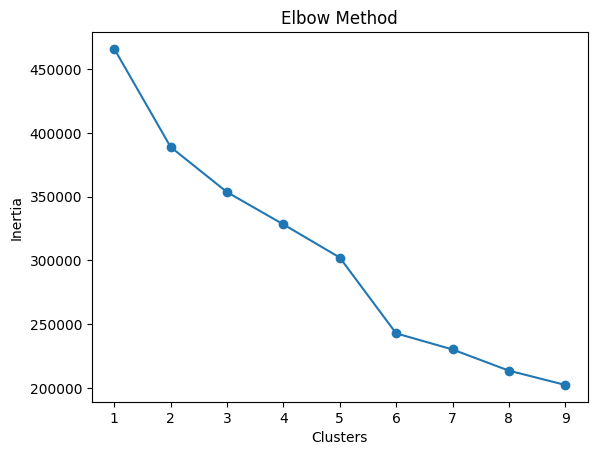

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn

inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_full['Cluster'] = kmeans.fit_predict(scaled)


In [ ]:
cluster_profile = rfm_full.groupby('Cluster').mean()
cluster_profile


,Recency,Frequency,Monetary,Avg_Days_Stay,Avg_Rooms,Avg_Hotel_Rating,Avg_Profit
Cluster,,,,,,,
0,1529.106328,1.000168,304.306686,3.013025,1.446500,4.441793,0.189042
1,1687.527079,1.000000,141.599154,3.607906,2.043762,4.306743,0.141833
2,1606.308072,1.000145,115.865908,3.245268,2.190949,3.913533,0.249680
3,1564.883992,1.000000,268.639753,3.089094,3.422932,4.407272,0.186377


In [ ]:
df_clustered = df.merge(rfm_full[['Cluster']], left_on='Customer ID', right_index=True)
df_clustered.head()


,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,Destination City,No. Of People,Check-in date,No of Days,Check-Out Date,Rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin,Cluster
0,DDMY00001,2010-01-01,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,Horsens,1,2010-01-12,8,2010-01-20,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.07,0.25,0
1,DDID00002,2010-01-01,9:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,Medellin,3,2010-01-21,1,2010-01-22,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.07,0.24,0
2,DDSG00003,2010-01-01,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,Munich,3,2010-01-02,7,2010-01-09,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.07,0.20,0
3,DDSG00004,2010-01-01,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,Montreal,3,2010-02-15,4,2010-02-19,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.07,0.13,1
4,DDKH00005,2010-01-01,5:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,Nairobi,5,2010-01-03,3,2010-01-06,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.07,0.17,3


In [ ]:
rfm_full.to_csv('Hotel_Customer_Segmentation.csv')
